# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [1]:
# Carregando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregue dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
try:
  df = pd.read_csv('/content/vehicles_us.csv')
except:
  df = pd.read_csv('C:/my_workspace/triple_ten/project3/data/vehicles_us.csv')

### Explore os dados iniciais

In [3]:
# verificando nomes das colunas
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

`Sem problemas nos nomes das colunas.`

In [4]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


`Temos 13 colunas. Percebe-se dados faltantes. Coluna Dtype nos mostra que teremos que transformar os tipos de dados em algumas colunas.`

In [5]:
# chamando .describe()
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
# chamando .shape
df.shape

(51525, 13)

In [7]:
# imprima uma amostragem dos dados
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [8]:
# chamando .tail()
df.tail(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51510,4200,2011.0,ford focus,excellent,4.0,gas,76000.0,automatic,sedan,silver,NaN,2019-01-13,43
51511,21600,2016.0,chevrolet camaro lt coupe 2d,good,6.0,gas,19579.0,other,coupe,grey,NaN,2018-08-26,51
51512,7300,2013.0,nissan altima,excellent,6.0,gas,7100.0,automatic,sedan,black,NaN,2018-06-17,63
51513,17999,2014.0,ram 1500,like new,8.0,gas,154000.0,automatic,pickup,white,1.0,2018-06-21,11
51514,4800,2012.0,volkswagen jetta,good,4.0,gas,138000.0,automatic,sedan,silver,NaN,2018-07-19,39
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [9]:
# verificando valores ausentes
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

`Valores ausentes nas colunas model_year, cylinders, odometer, paint_color e is_4wd.`

In [10]:
# verificando duplicados
df.duplicated().sum()

0

`Sem duplicados no df.`

`Coluna date_posted está em formato object e is_4wd apresenta valores float64.`

`Provavelmente teremos que tratar esses dados mais abaixo.`

In [11]:
# contando a porcentagem de valores ausentes nas colunas

# tamanho de df
df_size = len(df)

# coluna a coluna

# model_year
nan_model_year = df['model_year'].isna().sum()
print(f'Valores ausentes em model_year: {nan_model_year}. Percentual: {round((nan_model_year / df_size) * 100)}% do DataFrame.')

# cylinders
nan_cylinders = df['cylinders'].isna().sum()
print(f'Valores ausentes em cylinders: {nan_cylinders}. Percentual: {round((nan_cylinders / df_size) * 100)}% do DataFrame.')

# odometer
nan_odometer = df['odometer'].isna().sum()
print(f'Valores ausentes em odometer: {nan_odometer}. Percentual: {round((nan_odometer / df_size) * 100)}% do DataFrame.')

# paint color
nan_paint_color = df['paint_color'].isna().sum()
print(f'Valores ausentes em paint_color: {nan_paint_color}. Percentual: {round((nan_paint_color / df_size) * 100)}% do DataFrame.')

Valores ausentes em model_year: 3619. Percentual: 7% do DataFrame.
Valores ausentes em cylinders: 5260. Percentual: 10% do DataFrame.
Valores ausentes em odometer: 7892. Percentual: 15% do DataFrame.
Valores ausentes em paint_color: 9267. Percentual: 18% do DataFrame.


`Como o percentual de valores ausentes nas colunas são consideráveis, avaliaremos como vamos tratá-los em cada caso.`

*Vamos verificar se existe uma correlação entre model_year e odometer.*

In [12]:
corr_model_year_odometer = df['odometer'].corr(df['model_year'])
corr_model_year_odometer

-0.4739478581952975

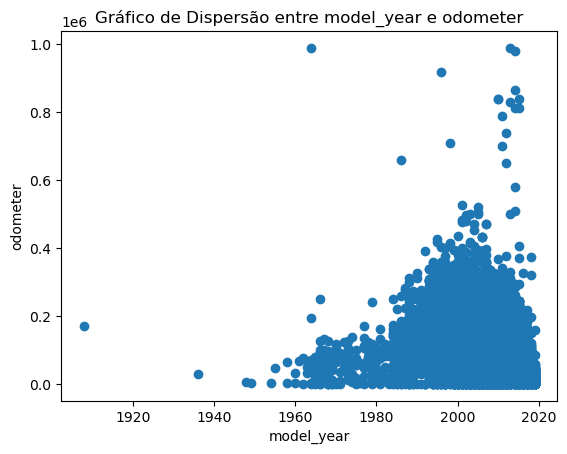

In [13]:
plt.scatter(df['model_year'], df['odometer'])
plt.xlabel('model_year')
plt.ylabel('odometer')
plt.title('Gráfico de Dispersão entre model_year e odometer')
plt.show()

`Existe uma correlação negativa entre odometer e model_year.`

*Criando uma matriz de correlação entre todas as colunas numéricas.*

In [14]:
df.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19


In [15]:
# variável com as colunas numéricas
numeric_columns = df.iloc[:, [0, 1, 3, 4, 6, 10]]


In [16]:
# aplicando o método corr
corr_matrix = numeric_columns.corr()

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_22424\2010844696.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = numeric_columns.corr()


In [17]:
# analisando...
corr_matrix

,price,model_year,cylinders,odometer,is_4wd
price,1.000000,0.428656,0.296627,-0.420299,NaN
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN
is_4wd,NaN,NaN,NaN,NaN,NaN


*Vamos ver graficamente.*

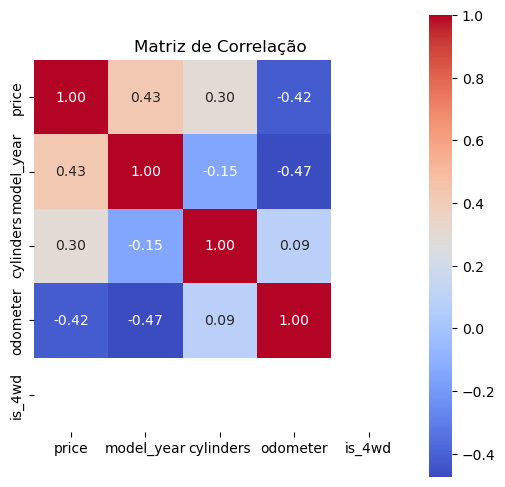

In [18]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação')
plt.show()

`Obtivemos bons insights verificando as correlações.`

*Certificando sobre a coluna is_4wd.*

In [19]:
# valores únicos na coluna is_4wd
df['is_4wd'].unique()

array([ 1., nan])

`A coluna is_4wd está como coluna booleana.`

`Discorreremos que 1 representa sim, e nan (0), como não.`

In [20]:
# corrigindo os valores ausentes na coluna is_4wd e conferindo o resultado
df['is_4wd'] = df['is_4wd'].fillna(0)
print(f"nan em is_4wd: {df['is_4wd'].isna().sum()}")
print(f"valores únicos em is_4wd: {df['is_4wd'].unique()}")

nan em is_4wd: 0
valores únicos em is_4wd: [1. 0.]


`Coluna is_4wd ajustada.`

*Verificando coluna paint_color.*

In [21]:
# analisando valores únicos
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [22]:
# buscando mais informações com o value_counts
df_paint_color = df.paint_color.value_counts()
df_paint_color

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

<Axes: >

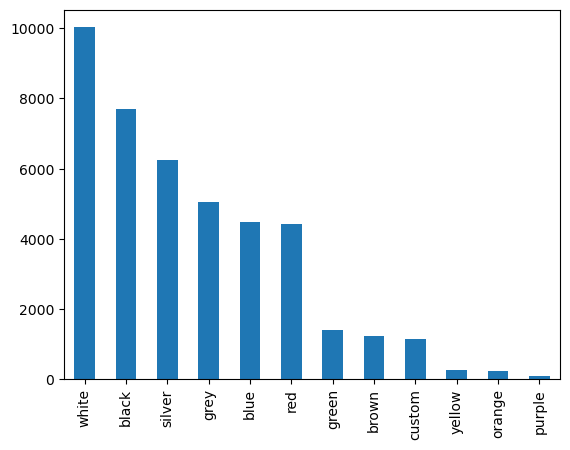

In [23]:
# plotando um gráfico de barras para melhor visualização
df_paint_color.plot(kind='bar')

`Dado que a visualização dos dados da coluna "paint_color" não trouxe insights significativos, considerando que se trata de uma variável categórica, optamos por preencher os valores ausentes com "unknown".`

In [24]:
# preenchendo com unknown a coluna paint_model com fillna
df['paint_color'] = df['paint_color'].fillna('unknown')

In [25]:
# verificando...
df.paint_color.isna().sum()

0

`Coluna sem valores Nan agora.`

*Vamos agora olhar a coluna cylinders.*

In [26]:
# dtype
df.cylinders.dtype

dtype('float64')

*Vamos transformar para números a coluna cylinders.*

In [27]:
# transformando...
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

In [28]:
# conferindo...
df.cylinders.dtype

dtype('float64')

*Olhando a correlação mais forte.*

In [29]:
# correlação
df.corr()

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_22424\662421230.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.005517,0.003804,0.002003,1.000000


*Correlação mais forte é com is_4wd. Vamos ver como podemos preencher com essa informação.*

In [30]:
# valores únicos em is_4wd
df.is_4wd.unique()

array([1., 0.])

In [31]:
# olhando média e mediana...
grouped_cylinders_by_is_4wd = df.groupby('is_4wd')['cylinders'].agg(['mean', 'median'])
grouped_cylinders_by_is_4wd

,mean,median
is_4wd,,
0.0,5.455569,6.0
1.0,6.803027,8.0


In [32]:
# salvando em uma variável a mediana
median_cylinders_by_is_4wd = df.groupby('is_4wd')['cylinders'].transform('median')
median_cylinders_by_is_4wd

0        8.0
1        8.0
2        6.0
3        6.0
4        6.0
        ... 
51520    6.0
51521    6.0
51522    6.0
51523    6.0
51524    6.0
Name: cylinders, Length: 51525, dtype: float64

In [33]:
# preenchendo com mediana a coluna cylinders
df['cylinders'].fillna(median_cylinders_by_is_4wd, inplace=True)

In [34]:
# atestando
df['cylinders'].isna().sum()

0

`Sem valores Nan em cylinders agora. Prosseguimos.`

## Cuide dos valores ausentes (se houver algum)

*Vamos agora melhorar os dados em model_year com base em price, pois como verificado no mapa de calor, existe uma "boa" correlação.*

In [35]:
# contando valores únicos...
len(df.price.unique())

3443

`São muitos valores, vamos agrupar.`

In [36]:
# qcut para intervalos
df['price_bins'] = pd.qcut(df.price, q = 6)


In [37]:
# olhanda a média e mediana
grouped = df.groupby('price_bins')['model_year'].agg(['mean', 'median']).reset_index()
grouped


,price_bins,mean,median
0,"(0.999, 3995.0]",2005.259264,2005.0
1,"(3995.0, 6300.0]",2006.874822,2007.0
2,"(6300.0, 9000.0]",2009.142556,2010.0
3,"(9000.0, 13900.0]",2010.645547,2012.0
4,"(13900.0, 20598.333]",2012.066213,2013.0
5,"(20598.333, 375000.0]",2014.557359,2015.0


In [38]:
# qcut usando os quartis
df['price_bins'] = pd.qcut(df['price'], q=(0, 0.25, 0.5, 0.75, 1))

In [39]:
# média e mediana pelos quartis...
grouped = df.groupby('price_bins')['model_year'].agg(['mean', 'median']).reset_index()
grouped

,price_bins,mean,median
0,"(0.999, 5000.0]",2005.579685,2006.0
1,"(5000.0, 9000.0]",2008.656620,2009.0
2,"(9000.0, 16839.0]",2010.992084,2012.0
3,"(16839.0, 375000.0]",2013.849251,2015.0


`Vamos preencher os valores Nan em model_year pela mediana do grouped.`

In [40]:
# agrupando pela mediana
grouped_median = df.groupby('price_bins')['model_year'].transform('median')

In [41]:
# preenchendo...
df['model_year'].fillna(grouped_median, inplace=True)

In [42]:
# valores Nan?
df['model_year'].isna().sum()

0

`Coluna model_year solucionada.`

*Vamos resolver a coluna odometer now!*

In [43]:
# qcut usando os quartis novamente
df['price_bins'] = pd.qcut(df['price'], q=(0, 0.25, 0.5, 0.75, 1))

In [44]:
# média e mediana pelos quartis...
grouped = df.groupby('price_bins')['odometer'].agg(['mean', 'median']).reset_index()
grouped

,price_bins,mean,median
0,"(0.999, 5000.0]",150766.125635,153207.0
1,"(5000.0, 9000.0]",129714.086705,126307.0
2,"(9000.0, 16839.0]",107710.521795,103273.0
3,"(16839.0, 375000.0]",73175.005504,67064.0


In [45]:
# mediana sempre a melhor opção, vamos agrupar
grouped_median = df.groupby('price_bins')['odometer'].transform('median')
grouped_median

0        103273.0
1         67064.0
2        126307.0
3        153207.0
4        103273.0
           ...   
51520    103273.0
51521    153207.0
51522    153207.0
51523    126307.0
51524    126307.0
Name: odometer, Length: 51525, dtype: float64

In [46]:
# retirando os valores Nan
df['odometer'].fillna(grouped_median, inplace=True)

In [47]:
# conferindo
df['odometer'].isna().sum()

0

`Tudo ok com a coluna odometer.`

## Corrija os tipos de dados

*Vamos alterar o formato de coluna date_posted.*

In [48]:
df['date_posted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: date_posted
Non-Null Count  Dtype 
--------------  ----- 
51525 non-null  object
dtypes: object(1)
memory usage: 402.7+ KB


In [49]:
# alterando com to_datetime do pandas
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [50]:
# verificando...
df['date_posted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: date_posted
Non-Null Count  Dtype         
--------------  -----         
51525 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 402.7 KB


`Coluna date_posted em formato adequado agora.`

## Enriqueça os dados

*Adicionando nova coluna date_listed na qual iremos realizar a soma com numpy.*

In [51]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['days_listed'] = pd.to_timedelta(df['days_listed'], unit='D')


In [52]:
# somando...
df['date_listed'] = df['date_posted'] + df['days_listed']

In [53]:
# conferindo
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_bins,date_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19 days,"(9000.0, 16839.0]",2018-07-12
1,25500,2015.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,"(16839.0, 375000.0]",2018-12-08
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,"(5000.0, 9000.0]",2019-04-27
3,1500,2003.0,ford f-150,fair,8.0,gas,153207.0,automatic,pickup,unknown,0.0,2019-03-22,9 days,"(0.999, 5000.0]",2019-03-31
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,"(9000.0, 16839.0]",2019-04-30


`Coluna date_posted criada com sucesso.`

*Vamos calcular a idade do veículo conforme a data de propaganda.*

In [54]:
# verificando os formatos
df.date_posted.info()


<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: date_posted
Non-Null Count  Dtype         
--------------  -----         
51525 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 402.7 KB


In [55]:
# verificando formato de model_year
df.model_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: model_year
Non-Null Count  Dtype  
--------------  -----  
51525 non-null  float64
dtypes: float64(1)
memory usage: 402.7 KB


In [56]:
# subtraindo e criando uma nova coluna com a idade do veículo...
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year'].astype(float)


In [57]:
# conferindo
df.vehicle_age.head()

0     7.0
1     3.0
2     6.0
3    16.0
4     2.0
Name: vehicle_age, dtype: float64

*Vamos agora calcular a quilometragem por ano.*

In [58]:
# dividindo a coluna odometers por vehicle_age
df['avg_km_per_year'] = df['odometer'] / df['vehicle_age']

In [59]:
# constatando...
df.avg_km_per_year.head()

0    20714.285714
1    29568.333333
2    18333.333333
3     9575.437500
4    40451.500000
Name: avg_km_per_year, dtype: float64

*Criando coluna condition.*

In [60]:
# verificando valores únicos
df.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [61]:
# substituindo...
# 'good' = 2, 'like new' = 4, 'fair' = 1, 'excellent' = 3, 'salvage' = 0, 'new' = 5
df['condition'] = df['condition'].replace({
                                            'new': 5,
                                            'like new': 4,
                                            'excellent': 3,
                                            'good': 2,
                                            'fair': 1,
                                            'salvage': 0
})

In [62]:
# verificando
df.condition.unique()

array([2, 4, 1, 3, 0, 5], dtype=int64)

`Valores na coluna condition alterados para numéricos.`

## Verifique os dados limpos

In [63]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   price            51525 non-null  int64          
 1   model_year       51525 non-null  float64        
 2   model            51525 non-null  object         
 3   condition        51525 non-null  int64          
 4   cylinders        51525 non-null  float64        
 5   fuel             51525 non-null  object         
 6   odometer         51525 non-null  float64        
 7   transmission     51525 non-null  object         
 8   type             51525 non-null  object         
 9   paint_color      51525 non-null  object         
 10  is_4wd           51525 non-null  float64        
 11  date_posted      51525 non-null  datetime64[ns] 
 12  days_listed      51525 non-null  timedelta64[ns]
 13  price_bins       51525 non-null  category       
 14  date_listed      51525

In [64]:
# imprima uma amostragem dos dados
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_bins,date_listed,vehicle_age,avg_km_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19 days,"(9000.0, 16839.0]",2018-07-12,7.0,20714.285714
1,25500,2015.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,"(16839.0, 375000.0]",2018-12-08,3.0,29568.333333
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,"(5000.0, 9000.0]",2019-04-27,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,153207.0,automatic,pickup,unknown,0.0,2019-03-22,9 days,"(0.999, 5000.0]",2019-03-31,16.0,9575.437500
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,"(9000.0, 16839.0]",2019-04-30,2.0,40451.500000


*Vamos criar um subplot com 5 histogramas e um ciclo for para gerá-los.*

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   price            51525 non-null  int64          
 1   model_year       51525 non-null  float64        
 2   model            51525 non-null  object         
 3   condition        51525 non-null  int64          
 4   cylinders        51525 non-null  float64        
 5   fuel             51525 non-null  object         
 6   odometer         51525 non-null  float64        
 7   transmission     51525 non-null  object         
 8   type             51525 non-null  object         
 9   paint_color      51525 non-null  object         
 10  is_4wd           51525 non-null  float64        
 11  date_posted      51525 non-null  datetime64[ns] 
 12  days_listed      51525 non-null  timedelta64[ns]
 13  price_bins       51525 non-null  category       
 14  date_listed      51525

In [66]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'price_bins', 'date_listed',
       'vehicle_age', 'avg_km_per_year'],
      dtype='object')

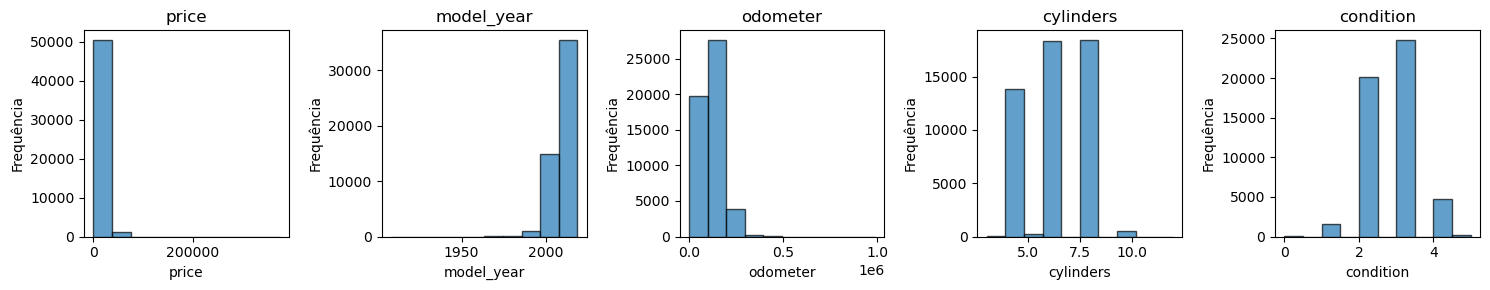

In [67]:
# subplots
fig, axis = plt.subplots(1, 5, figsize = (15, 3))

# colunas
col = ['price', 'model_year', 'odometer', 'cylinders', 'condition']

# ciclo for para criar os histogramas
for i, coluna in enumerate(col):
    axis[i].hist(df[coluna], bins = 10, edgecolor = 'black', alpha = 0.7)
    axis[i].set_title(coluna)
    axis[i].set_xlabel(coluna)
    axis[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


`Através da visualização dos histogramas acima, teremos que gerar boxplots das colunas para averiguar valores atípicos.`

*Vamos fazer uma cópia do nosso df.*

In [68]:
original_df = df.copy()

*Gerando boxplot das colunas para verificação dos outliers e removendo-os quando necessário.*

*Coluna price.*

In [69]:
# informaçãoes
df.price.describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

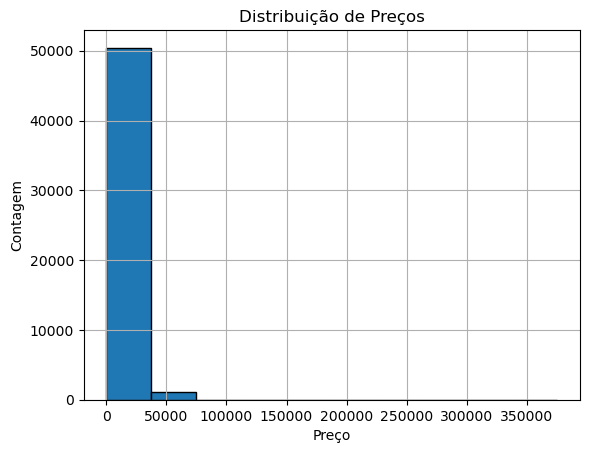

In [70]:
# histograma para verificar
plt.hist(df['price'], bins=10, edgecolor='k')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição de Preços')
plt.grid(True)
plt.show()

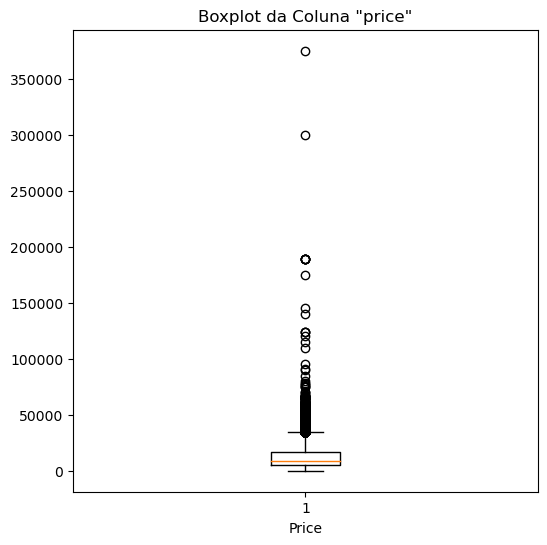

In [71]:
# boxplot da coluna price
plt.figure(figsize=(6, 6))
plt.boxplot(df['price'], vert=True)
plt.title('Boxplot da Coluna "price"')
plt.xlabel('Price')
plt.show()

*Muitos outliers. Definindo limites superiores & inferiores*

In [72]:
# removendo carros com price menor do $5000
df = df[df['price'] >= 5000]

In [73]:
# acima de $50000 também
df = df[df['price'] <= 50000]

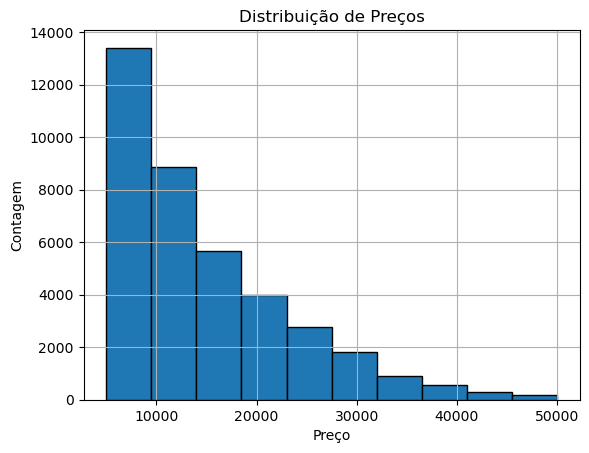

In [74]:
# histograma de verificação
plt.hist(df['price'], bins=10, edgecolor='k')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição de Preços')
plt.grid(True)
plt.show()

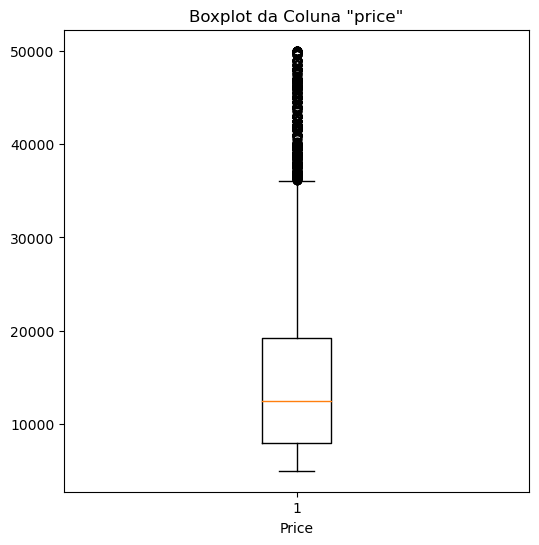

In [75]:
# um novo boxplot da coluna price
plt.figure(figsize=(6, 6))
plt.boxplot(df['price'], vert=True)
plt.title('Boxplot da Coluna "price"')
plt.xlabel('Price')
plt.show()

In [76]:
df.price.describe()

count    38464.000000
mean     14817.324511
std       8624.280035
min       5000.000000
25%       7995.000000
50%      12500.000000
75%      19231.250000
max      50000.000000
Name: price, dtype: float64

`Removemos do df outliers, com valores abaixo de $5000 para carros, melhorando assim tanto a visualização do histograma que apresentou uma distribuição mais uniforme.`

`Também tínhamos outliers com valores muito altos e os removemos do df.`

*Coluna model_year.*

In [77]:
df.model_year.describe()

count    38464.000000
mean      2011.151752
std          5.587845
min       1908.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2019.000000
Name: model_year, dtype: float64

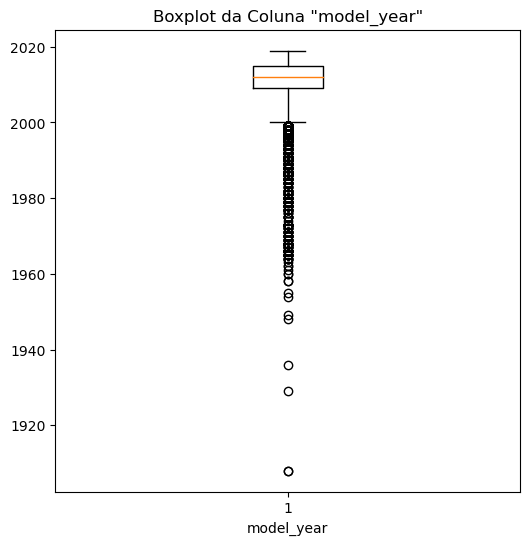

In [78]:
# boxplot da coluna model_year
plt.figure(figsize=(6, 6))
plt.boxplot(df['model_year'], vert=True)
plt.title('Boxplot da Coluna "model_year"')
plt.xlabel('model_year')
plt.show()

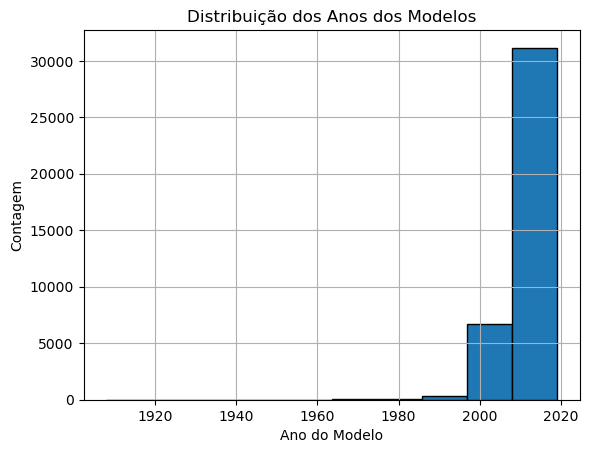

In [79]:
# histograma de model_year
plt.hist(df['model_year'], bins=10, edgecolor='k')
plt.xlabel('Ano do Modelo')
plt.ylabel('Contagem')
plt.title('Distribuição dos Anos dos Modelos')
plt.grid(True)
plt.show()

In [80]:
# contanto carros com model_year abaixo de 2000
(df['model_year'] < 1980).sum()

161

*Removendo outliers da coluna model_year.*

In [81]:
# removendo com base no histograma da distribuição
df = df[df['model_year'] > 1980]

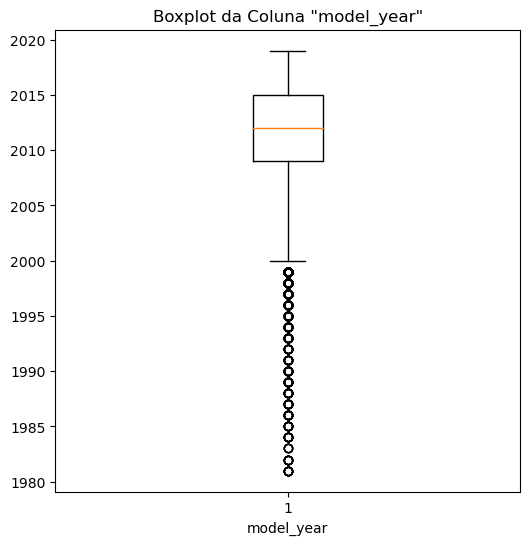

In [82]:
# boxplot da coluna para averiguação
plt.figure(figsize=(6, 6))
plt.boxplot(df['model_year'], vert=True)
plt.title('Boxplot da Coluna "model_year"')
plt.xlabel('model_year')
plt.show()

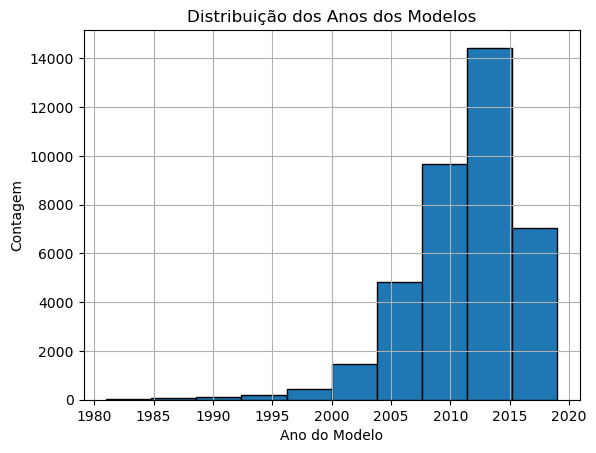

In [83]:
# histograma de model_year para averiguação
plt.hist(df['model_year'], bins=10, edgecolor='k')
plt.xlabel('Ano do Modelo')
plt.ylabel('Contagem')
plt.title('Distribuição dos Anos dos Modelos')
plt.grid(True)
plt.show()

In [84]:
df.model_year.describe()

count    38292.000000
mean      2011.338374
std          4.808410
min       1981.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2019.000000
Name: model_year, dtype: float64

`Apresentação na coluna model_year está melhorada, conforme histograma acima.`



*Coluna odometer.*

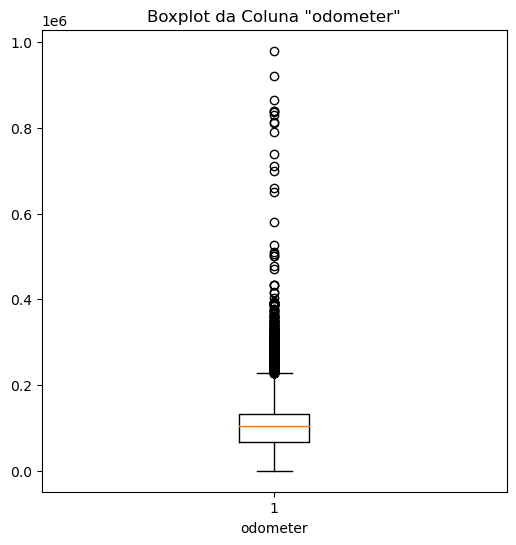

In [85]:
# boxplot da coluna odometer
plt.figure(figsize=(6, 6))
plt.boxplot(df['odometer'], vert=True)
plt.title('Boxplot da Coluna "odometer"')
plt.xlabel('odometer')
plt.show()

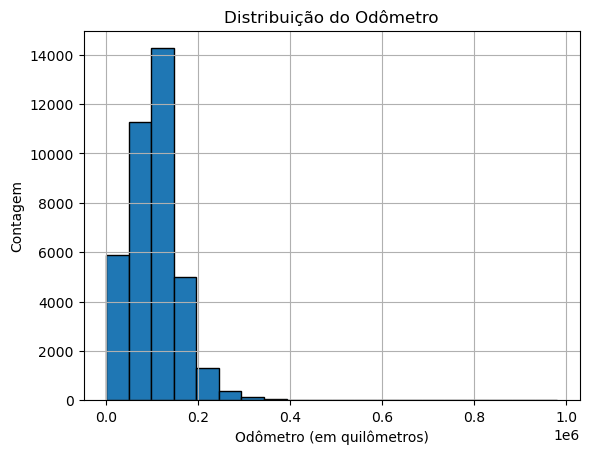

In [86]:
# histograma
plt.hist(df['odometer'], bins=20, edgecolor='k')
plt.xlabel('Odômetro (em quilômetros)')
plt.ylabel('Contagem')
plt.title('Distribuição do Odômetro')
plt.grid(True)
plt.show()

In [87]:
# informações
df.odometer.describe()

count     38292.000000
mean     103737.795284
std       55835.400337
min           0.000000
25%       67064.000000
50%      103273.000000
75%      131500.000000
max      980000.000000
Name: odometer, dtype: float64

*Processo de remoção dos outliers em odometer.*



In [88]:
# calculando o quartis e definindo IQR
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

In [89]:
# vamos definir os limites superiores apenas, pois sabendo que podemos ter carro em estado de novo...
upper_limit = Q3 + 1.5 * IQR
upper_limit

228154.0

In [90]:
# outliers sendo removidos
df = df[(df['odometer'] <= upper_limit)]

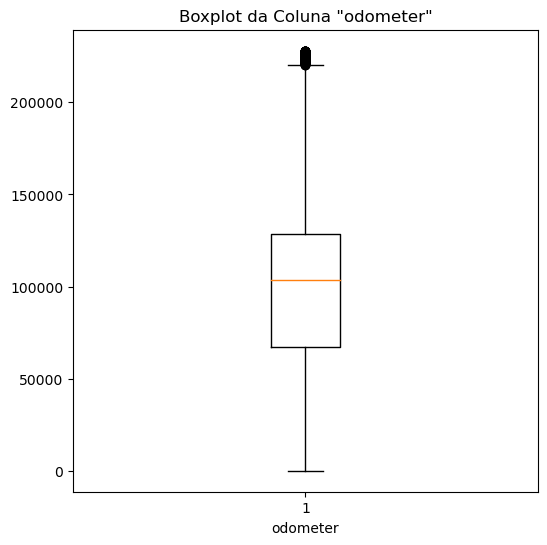

In [91]:
# aquele boxplot para conferência
plt.figure(figsize=(6, 6))
plt.boxplot(df['odometer'], vert=True)
plt.title('Boxplot da Coluna "odometer"')
plt.xlabel('odometer')
plt.show()

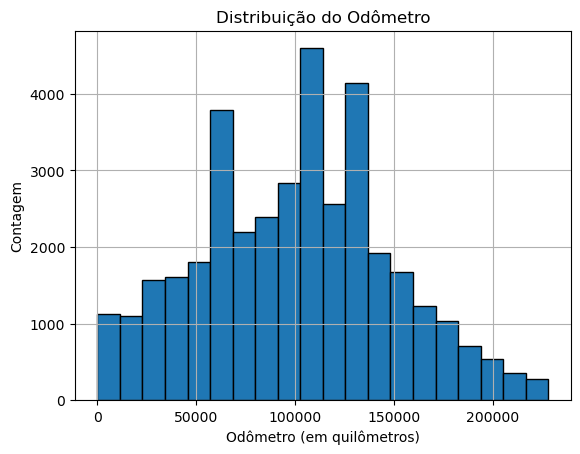

In [92]:
# histograma novamente
plt.hist(df['odometer'], bins=20, edgecolor='k')
plt.xlabel('Odômetro (em quilômetros)')
plt.ylabel('Contagem')
plt.title('Distribuição do Odômetro')
plt.grid(True)
plt.show()

In [93]:
# verificando
df.odometer.describe()

count     37420.000000
mean      99665.741609
std       47993.330989
min           0.000000
25%       67064.000000
50%      103273.000000
75%      128418.500000
max      228000.000000
Name: odometer, dtype: float64

`Processo de remoção dos outliers em odometer concluído com sucesso.`

*Coluna cylinders.*

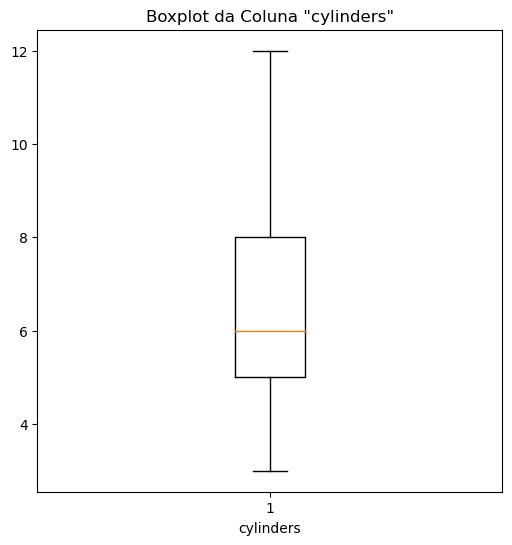

In [94]:
# boxplot da coluna cylinders
plt.figure(figsize=(6, 6))
plt.boxplot(df['cylinders'], vert=True)
plt.title('Boxplot da Coluna "cylinders"')
plt.xlabel('cylinders')
plt.show()

`Sem outliers, prosseguimos.`

*Coluna condition.*

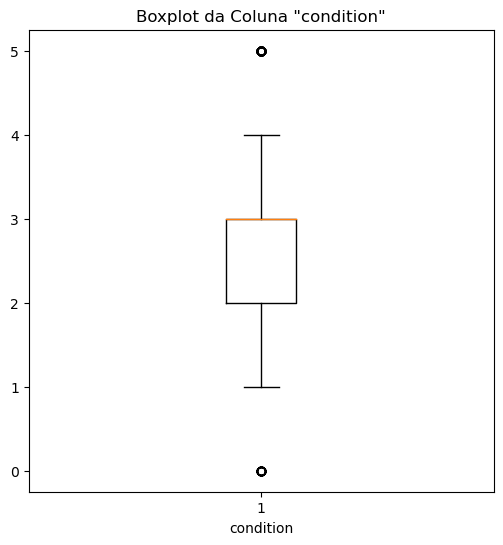

In [95]:
# boxplot da coluna condition
plt.figure(figsize=(6, 6))
plt.boxplot(df['condition'], vert=True)
plt.title('Boxplot da Coluna "condition"')
plt.xlabel('condition')
plt.show()

`Coluna condition é praticamente uma coluna categórica. O que o boxplot mostrou são dados padrões desta coluna. Seguiremos adiante.`

In [96]:
# verificando as informação do df com outliers removidos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37420 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   price            37420 non-null  int64          
 1   model_year       37420 non-null  float64        
 2   model            37420 non-null  object         
 3   condition        37420 non-null  int64          
 4   cylinders        37420 non-null  float64        
 5   fuel             37420 non-null  object         
 6   odometer         37420 non-null  float64        
 7   transmission     37420 non-null  object         
 8   type             37420 non-null  object         
 9   paint_color      37420 non-null  object         
 10  is_4wd           37420 non-null  float64        
 11  date_posted      37420 non-null  datetime64[ns] 
 12  days_listed      37420 non-null  timedelta64[ns]
 13  price_bins       37420 non-null  category       
 14  date_listed      37420

## Estude os parâmetros fundamentais sem valores atípicos

In [97]:
# nosso df original
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   price            51525 non-null  int64          
 1   model_year       51525 non-null  float64        
 2   model            51525 non-null  object         
 3   condition        51525 non-null  int64          
 4   cylinders        51525 non-null  float64        
 5   fuel             51525 non-null  object         
 6   odometer         51525 non-null  float64        
 7   transmission     51525 non-null  object         
 8   type             51525 non-null  object         
 9   paint_color      51525 non-null  object         
 10  is_4wd           51525 non-null  float64        
 11  date_posted      51525 non-null  datetime64[ns] 
 12  days_listed      51525 non-null  timedelta64[ns]
 13  price_bins       51525 non-null  category       
 14  date_listed      51525

In [98]:
# diferença de linhas após a "limpeza"
len(original_df) - len(df)

14105

In [99]:
# em porcentagem
len(df) / len(original_df)

0.7262493934983018

*Realizando algumas comparações com histogramas.*

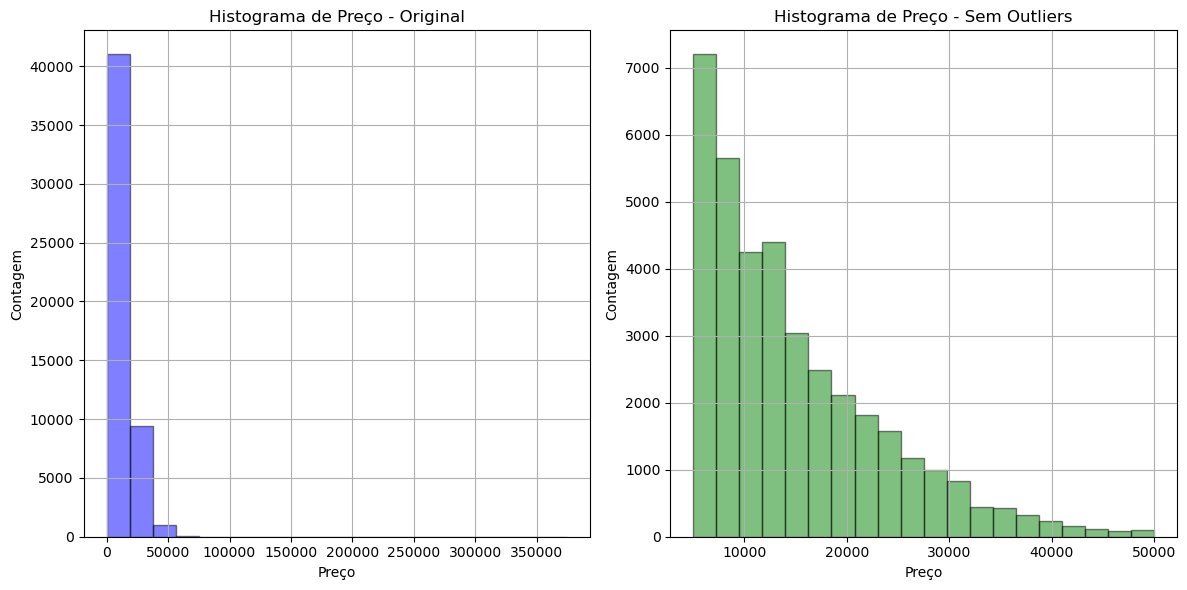

In [100]:
# coluna price
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histograma do original_df
ax1.hist(original_df['price'], bins=20, alpha=0.5, color='blue', edgecolor='k')
ax1.set_xlabel('Preço')
ax1.set_ylabel('Contagem')
ax1.set_title('Histograma de Preço - Original')
ax1.grid(True)

# Histograma do df
ax2.hist(df['price'], bins=20, alpha=0.5, color='green', edgecolor='k')
ax2.set_xlabel('Preço')
ax2.set_ylabel('Contagem')
ax2.set_title('Histograma de Preço - Sem Outliers')
ax2.grid(True)

plt.tight_layout()
plt.show()

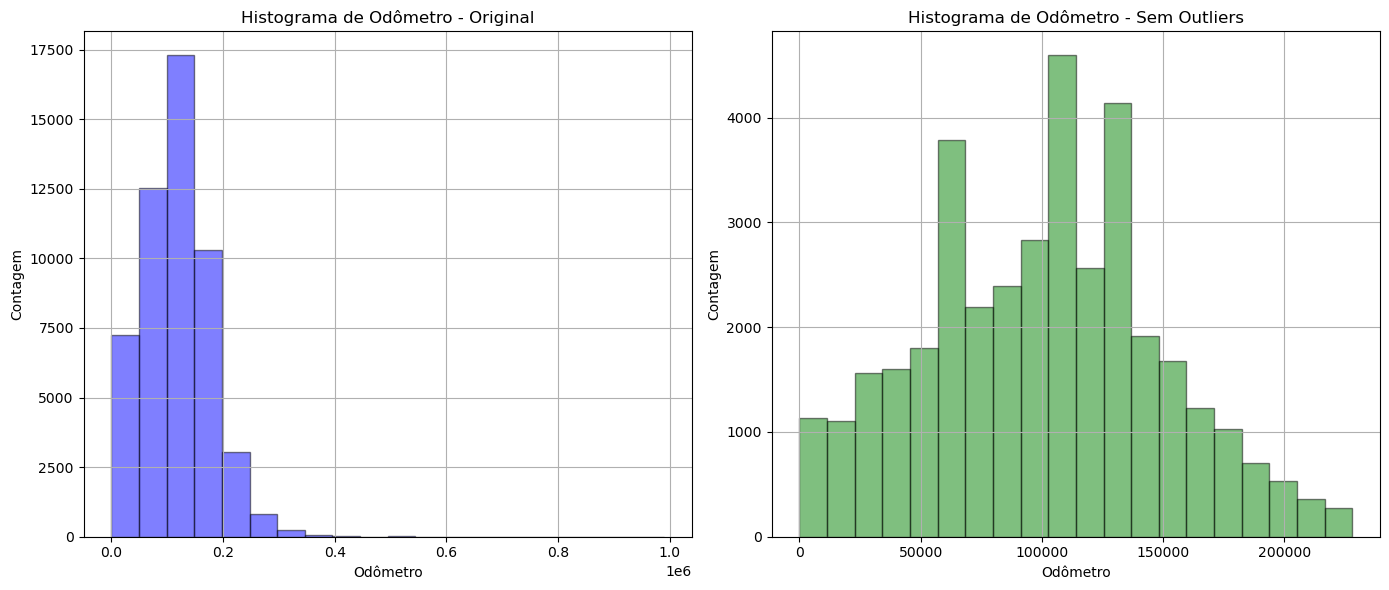

In [101]:
# coluna odometer
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(original_df['odometer'], bins=20, alpha=0.5, color='blue', edgecolor='k')
ax1.set_xlabel('Odômetro')
ax1.set_ylabel('Contagem')
ax1.set_title('Histograma de Odômetro - Original')
ax1.grid(True)

ax2.hist(df['odometer'], bins=20, alpha=0.5, color='green', edgecolor='k')
ax2.set_xlabel('Odômetro')
ax2.set_ylabel('Contagem')
ax2.set_title('Histograma de Odômetro - Sem Outliers')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [102]:
# verificando coluna
df.days_listed.describe()

count                         37420
mean     39 days 12:32:51.822554783
std      28 days 06:37:41.548344829
min                 0 days 00:00:00
25%                19 days 00:00:00
50%                33 days 00:00:00
75%                53 days 00:00:00
max               271 days 00:00:00
Name: days_listed, dtype: object

In [103]:
# mais informações
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_bins,date_listed,vehicle_age,avg_km_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19 days,"(9000.0, 16839.0]",2018-07-12,7.0,20714.285714
1,25500,2015.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,"(16839.0, 375000.0]",2018-12-08,3.0,29568.333333
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,"(5000.0, 9000.0]",2019-04-27,6.0,18333.333333
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,"(9000.0, 16839.0]",2019-04-30,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15 days,"(9000.0, 16839.0]",2018-07-05,4.0,14488.500000


In [104]:
# cálculos rápidos para extrair o número em dias para float
df['days_listed_number'] = (df['date_listed'] - df['date_posted']).dt.days
df['days_listed_number'].describe()

count    37420.000000
mean        39.522822
std         28.276175
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed_number, dtype: float64

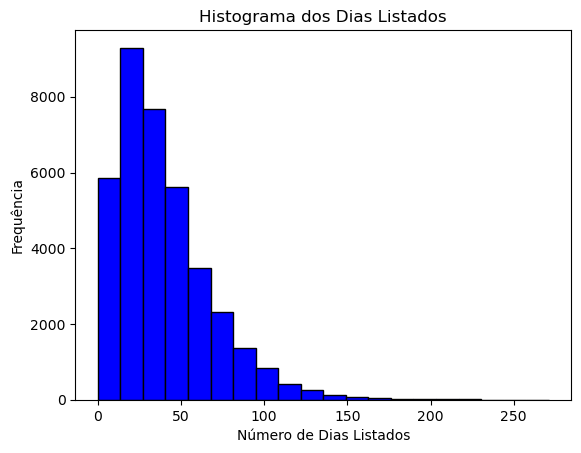

In [105]:
# Histograma para visualizar melhor
plt.hist(df['days_listed_number'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Número de Dias Listados')
plt.ylabel('Frequência')
plt.title('Histograma dos Dias Listados')
plt.show()

In [106]:
# mediana
median = df['days_listed_number'].median()
median

33.0

In [107]:
# média
mean = df['days_listed_number'].mean()
mean

39.522822020309995

`As propagandas ficaram em média por +39 dias. Já a mediana informa que são 33 dias. Vamos verificar os tempos mais longos e os mais curtos.`

In [108]:
# vamos ver o valor máximo
max_time = df['days_listed_number'].max()
max_time

271

In [109]:
# Encontrar o tempo mais curto
short_time = df['days_listed_number'].min()
short_time

0

In [110]:
# usando len
short_time_occurrence_count = (df['days_listed_number'] == 0).sum()
short_time_occurrence_count

38

In [111]:
# Contando os valores maiores que a média
avg_days_listed = df['days_listed_number'].mean()
above_avg_occurrence = (df['days_listed_number'] > avg_days_listed).sum()
above_avg_occurrence

15119

In [112]:
# e maiores que a mediana...
median_days_listed = df['days_listed_number'].median()
above_median_occurrence = (df['days_listed_number'] > median_days_listed).sum()
above_median_occurrence

18513

`Temos alguns fatos interessantes após olhar esses valores.`
`Existem 38 ocorrencias com menos de 1 dia. Ou venderam o veículo no mesmo dia ou existe algum erro de informação ali.`
`Outro fato, é de que temos mais de 15 mil ocorrencias, onde as propagandas excederam o tempo médio e mais de 18 mil que excederam o tempo mediano. Se as propagandas tiverem algum custo para a empresa, melhor repensar a estratégia!`

## Média de preços por cada tipo de veículo

In [113]:
# gerando uma pivot table
pivot_per_type = pd.pivot_table(df, index='type', values=['days_listed_number', 'price'], aggfunc='mean')
pivot_per_type = pivot_per_type.sort_values(by='days_listed_number', ascending=False)
pivot_per_type

,days_listed_number,price
type,,
bus,52.187500,22830.625000
van,41.921700,13482.655481
hatchback,41.043269,9138.490385
wagon,40.889706,11322.446691
offroad,39.965909,16354.727273
SUV,39.653775,13762.093459
truck,39.471027,18608.858712
pickup,39.442934,18452.066726
mini-van,39.433518,10833.878116


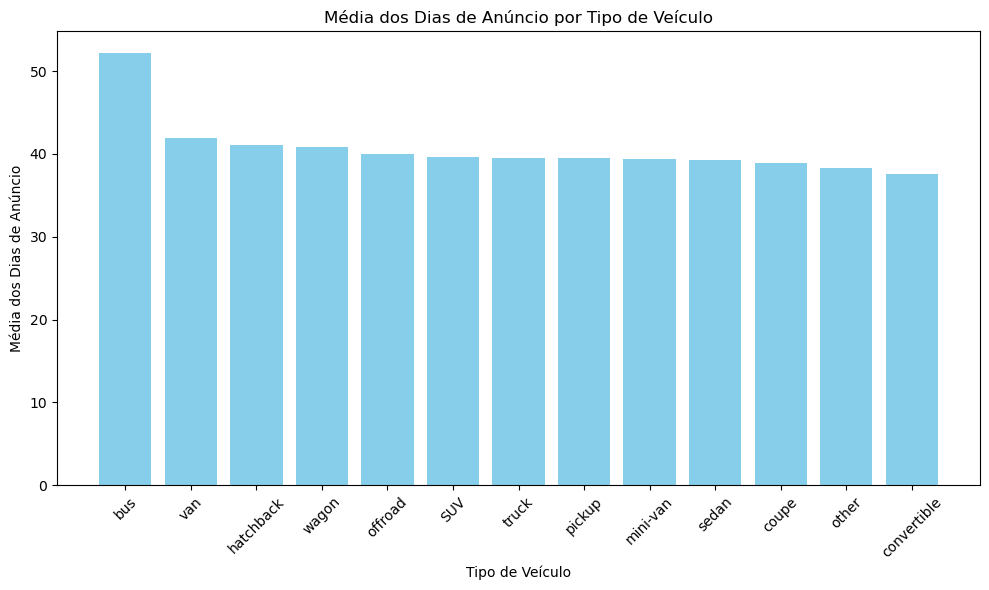

In [114]:
# plotando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(pivot_per_type.index, pivot_per_type['days_listed_number'], color='skyblue')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Média dos Dias de Anúncio')
plt.title('Média dos Dias de Anúncio por Tipo de Veículo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Os tipos com maiores tempos de propaganda são veículos grandes, como ônibus e van. Ônibus chega a ter 10 dias a mais em média do que os outros tipos de veículos.`

## Fatores de preço

In [115]:
# matriz de correlação
correlation_matrix = df[['price', 'odometer', 'vehicle_age']].corr()
correlation_matrix

,price,odometer,vehicle_age
price,1.000000,-0.471456,-0.488134
odometer,-0.471456,1.000000,0.472866
vehicle_age,-0.488134,0.472866,1.000000


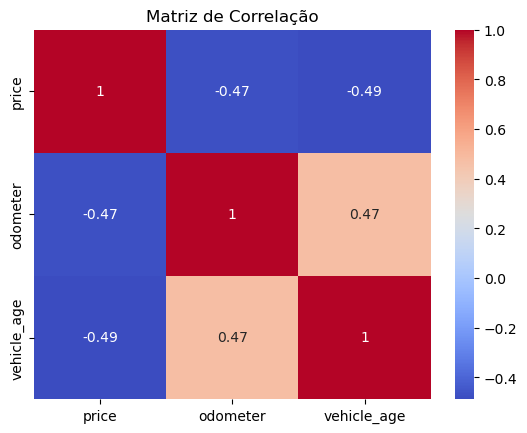

In [116]:
# Criando um gráfico da matriz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

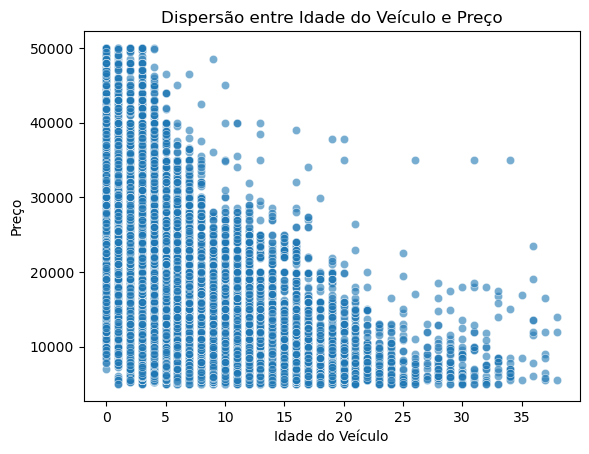

In [117]:
# gráfico de dispersão para visualizar as relações entre as variáveis
sns.scatterplot(x='vehicle_age', y='price', data=df, alpha = .6)
plt.title('Dispersão entre Idade do Veículo e Preço')
plt.xlabel('Idade do Veículo')
plt.ylabel('Preço')
plt.show()

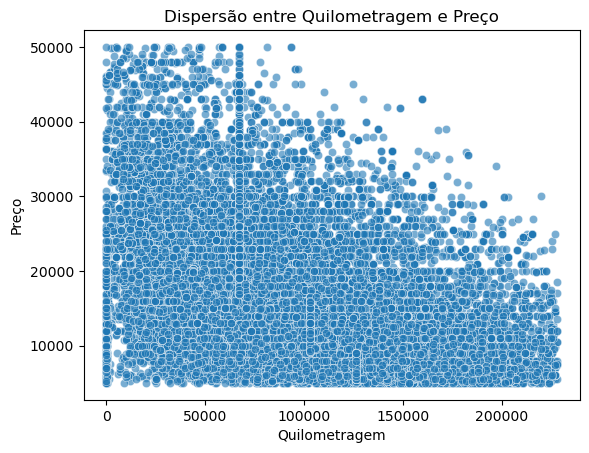

In [118]:
# gráfico de dispersão para odometer e price
sns.scatterplot(x='odometer', y='price', data=df, alpha = .6)
plt.title('Dispersão entre Quilometragem e Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.show()

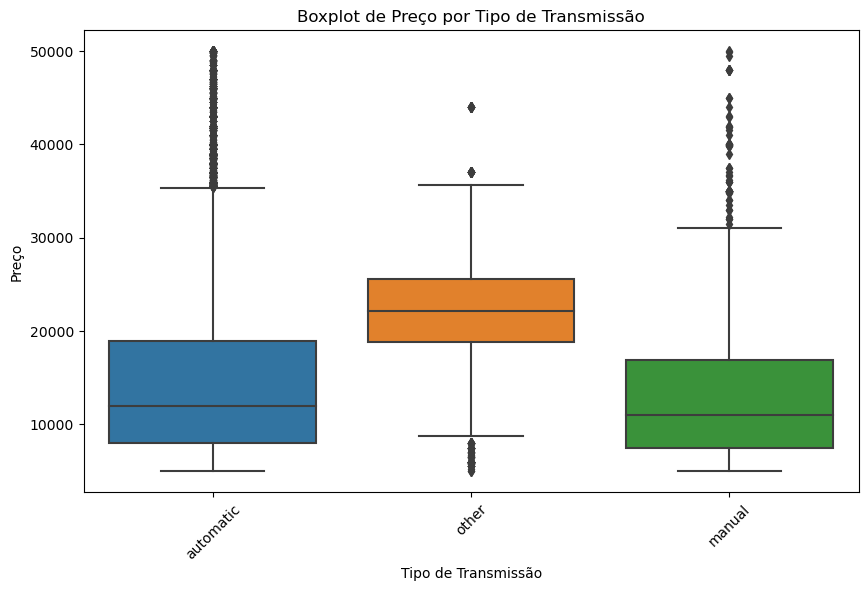

In [119]:
# Boxplot de transmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Boxplot de Preço por Tipo de Transmissão')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

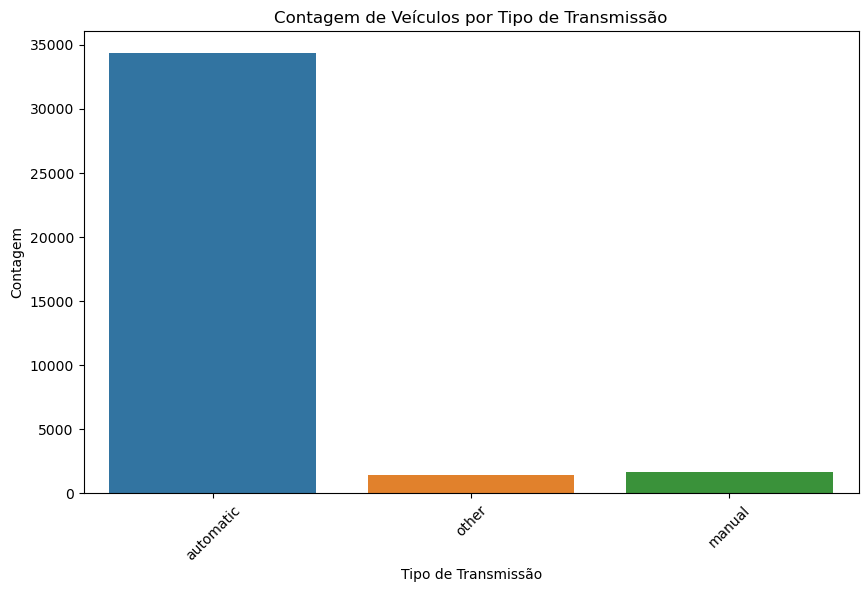

In [120]:
# verificando a preferência por tipo de transmissão
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df)
plt.title('Contagem de Veículos por Tipo de Transmissão')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

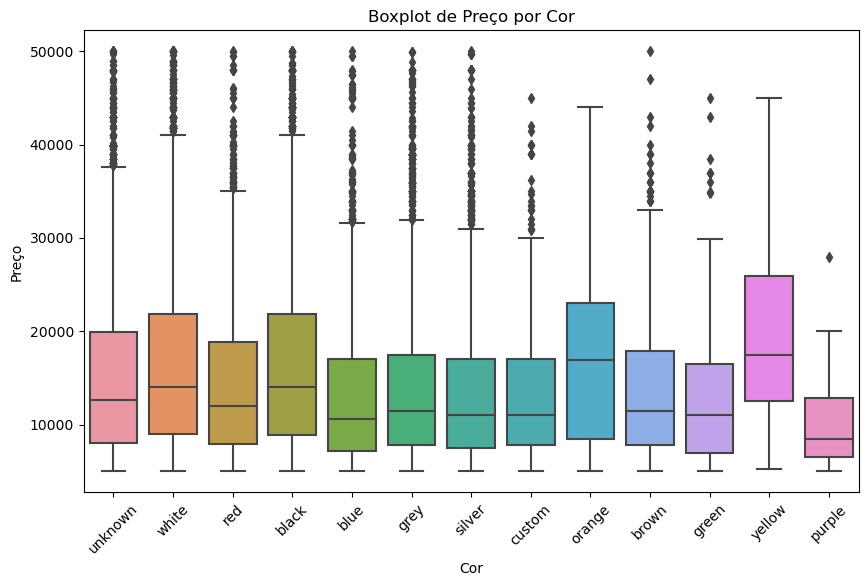

In [121]:
# Boxplot de paint_color
plt.figure(figsize=(10, 6))
sns.boxplot(x='paint_color', y='price', data=df)
plt.title('Boxplot de Preço por Cor')
plt.xlabel('Cor')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

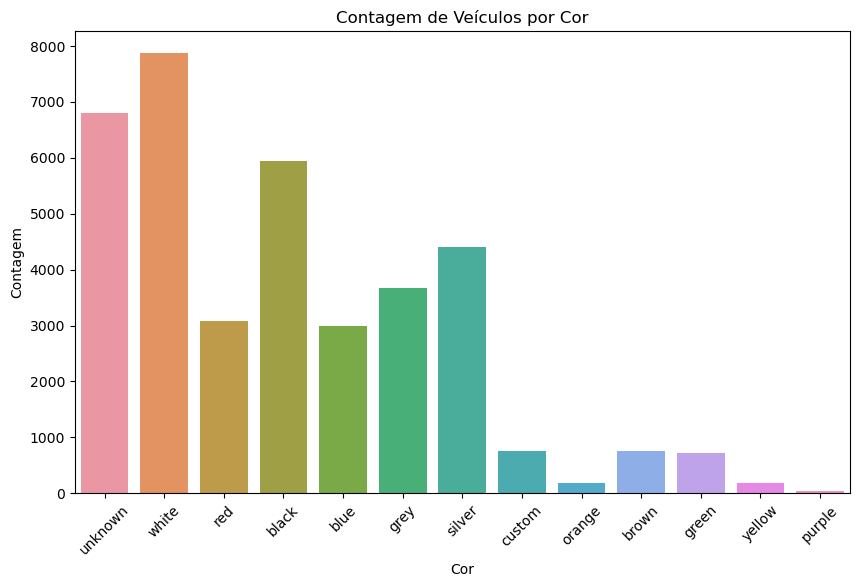

In [122]:
# contagem por paint_color
plt.figure(figsize=(10, 6))
sns.countplot(x='paint_color', data=df)
plt.title('Contagem de Veículos por Cor')
plt.xlabel('Cor')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

*Novamente foi um imenso prazer de realizar essa tarefa e também um desafio, pois este dataset estava bem "machucado", sem dados duplicados, mas com muitos valores faltantes e os dados em formatos diferentes do ideal.*

*A parte de tratamento de dados e análise exploratória levaram um tempo relativamente grande do trabalho e foi preciso em alguns casos gerar correlações e gráficos entre as variáveis para melhor entendimento do dataset.*

*Muitos outliers e com a remoção deles, perdemos uma parcela generosa dos nossos dados. Ossos do ofício.*

*O fator preço é fortemente influenciado por odometer e idade do veículo, mas de maneira inversa e faz muito sentido. Quanto mais velho e mais "rodado" o veículo, mais o preço decai.*

*O tipo de transmissão que vai dominar o mundo é a transmissão automática, conforme esse dataset nos mostra. Conveniência, conforto e segurança.*

*Uma olhada nas cores dos veículos nos mostrou que a ocorrência das cores clássicas permanecem em alta e com maior frequência.
Branco, preto, prata, cinza, além de vermelho e azul.*

*Cores mais "vibrantes" aparecem com menos frequência nos veículos deste dataset.*



*Enfim, um dataset interessante de se trabalhar onde conseguimos descobrir:*
*   os fatores que mais influenciam nos preços dos veículos
*   o tempo médio de dias das propagandas para cada tipo
*   a preferência por transmissão automática
*   que os carros conversíveis tem o menor tempo médio de propaganda ou a venda seja mais rápida
*   que existem pouquíssimos veículos na cor roxa
*   e que mesmo o dataset contendo carros com data de fabricação entre 1908 e 2019, a média e mediana de idade dos veículos ficou entre 2009 e 2011.